# **1. Introduction**

# **2. Import Libraries**

In [2]:
# Library Data Manipulation
import pandas as pd
import numpy as np

# Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm
import matplotlib.dates as mdates

# Warning
import warnings
warnings.filterwarnings('ignore')

c:\Users\irfan\anaconda3\New folder\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\irfan\anaconda3\New folder\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**Insights**

Before starting this project, it is necessary to import all the necessary libraries to facilitate the work on this task. Each library has its own functions that consist of data manipulation and visualization.

In [3]:
'''
Loading data into a DataFrame from a CSV source
'''

df = pd.read_csv('consumer_complaints_cleaned.csv')


**Insights**

The code is used to read a CSV file named `consumer_complaints_cleaned.csv` which will be loaded into a DataFrame which will then be manipulated and further analyzed by the data. 

# **3. Data Loading**

## **3.1. Displaying Top Data**

In [4]:
df.head()

,complaint_id,date_received,date_sent_to_company,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,company_response_to_consumer,timely_response,consumer_disputed
0,1299258,2015-03-24,2015-03-24,Payday loan,Payday loan,Can't stop charges to bank account,Can't stop charges to bank account,"I took out a Loan from Cash Central XXXX, Al f...",Company chooses not to provide a public response,"Community Choice Financial, Inc.",AL,351XX,Older American,Consent provided,Web,Closed with explanation,Yes,No
1,1290580,2015-03-19,2015-03-19,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,This dentist appt was back in 2012 and I was u...,Company believes it acted appropriately as aut...,Accounts Receivable Consultants Inc.,TX,774XX,Older American,Consent provided,Web,Closed with explanation,Yes,No
2,1299540,2015-03-24,2015-03-24,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Right to dispute notice not received,I pulled a credit report and noticed a collect...,Company believes it acted appropriately as aut...,First Credit Services Inc.,NY,140XX,Servicemember,Consent provided,Web,Closed with explanation,Yes,No
3,1292215,2015-03-19,2015-03-25,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,I have disputed the information with the compa...,Company chooses not to provide a public response,BB&T Financial,MD,207XX,Servicemember,Consent provided,Web,Closed with explanation,Yes,No
4,1292216,2015-03-19,2015-04-03,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,"I have reached out to the company. However, th...",Company chooses not to provide a public response,"SunTrust Banks, Inc.",MD,207XX,Servicemember,Consent provided,Web,Closed with explanation,Yes,Yes


**Insights**

Using pandas `.head()`, it can display the top data from the dataset.

## **3.2. Displaying Summary Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   complaint_id                  2221 non-null   int64 
 1   date_received                 2221 non-null   object
 2   date_sent_to_company          2221 non-null   object
 3   product                       2221 non-null   object
 4   sub_product                   2221 non-null   object
 5   issue                         2221 non-null   object
 6   sub_issue                     2221 non-null   object
 7   consumer_complaint_narrative  2221 non-null   object
 8   company_public_response       2221 non-null   object
 9   company                       2221 non-null   object
 10  state                         2221 non-null   object
 11  zip_code                      2221 non-null   object
 12  tags                          2221 non-null   object
 13  consumer_consent_p

**Insights**

- Using pandas .info() can obtain a summary of the information from this dataset, including information on the number of rows and columns and the data type of each column.

- Based on these results, it is known that this data consists of `2221 rows and 18 columns`.

- This data type consists of `1 integer and 17 objects`.

- In this dataset, it is known that there are no columns that have a 'missing value'.

## **3.3. Displaying Unique Values for Each Column**

In [6]:
# Displays unique values in each column
unique_values_all = df.apply(pd.Series.unique)

unique_values_all

complaint_id                    [1299258, 1290580, 1299540, 1292215, 1292216, ...
date_received                   [2015-03-24, 2015-03-19, 2015-03-25, 2015-04-0...
date_sent_to_company            [2015-03-24, 2015-03-19, 2015-03-25, 2015-04-0...
product                              [Payday loan, Debt collection, Student loan]
sub_product                     [Payday loan, Medical, Other (i.e. phone, heal...
issue                           [Can't stop charges to bank account, Cont'd at...
sub_issue                       [Can't stop charges to bank account, Debt is n...
consumer_complaint_narrative    [I took out a Loan from Cash Central XXXX, Al ...
company_public_response         [Company chooses not to provide a public respo...
company                         [Community Choice Financial, Inc., Accounts Re...
state                           [AL, TX, NY, MD, WA, CA, OK, WI, TN, OH, GA, K...
zip_code                        [351XX, 774XX, 140XX, 207XX, 985XX, 914XX, 112...
tags            

**Insights**

The code is useful for displaying all the unique values of each column in the DataFrame.

## **3.4. Change the data type**

In [7]:
# Convert 'date_received' and 'date_sent_to_company' to datetime
df['date_received'] = pd.to_datetime(df['date_received'], format='%Y-%m-%d')
df['date_sent_to_company'] = pd.to_datetime(df['date_sent_to_company'], format='%Y-%m-%d')

**Insights**

The code is useful for changing the `date_received` dan `date_sent_to_company` column data type in the DataFrame from the `object` data type to the `datetime` data type.

## **3.5. Drop the 'complaint_id' Column**

In [8]:
df.drop(['complaint_id'], axis = 1, inplace = True)

**Insights**

The `complaint_id` column is dropped because it has a unique value for each participant and has no role for data visualization.

## **3.6. Create a New Column**

In [9]:
# Extract year, month, adn day for 'date_received'
df['year_received'] = df['date_received'].dt.year
df['month_received'] = df['date_received'].dt.month
df['day_received'] = df['date_received'].dt.day


# Extract year, month, adn day for 'date_sent_to_company'
df['year_sent_to_company'] = df['date_sent_to_company'].dt.year
df['month_sent_to_company'] = df['date_sent_to_company'].dt.month
df['day_sent_to_company'] = df['date_sent_to_company'].dt.day

# Calculating response time
df['response_time'] = (df['date_sent_to_company'] - df['date_received']).dt.days

**Insights**

Create new columns with a more specific purpose for a more in-depth analysis of consumer complaint data.

In [10]:
# Save DataFrame to CSV file
df.to_csv('EDA_Vis_Tableau.csv', index=False)

# **4. Exploratory Data Analysis (EDA)**

#### **_Numerical data descriptive summary_**

In [11]:
df.describe(exclude='object').T

,count,mean,min,25%,50%,75%,max,std
date_received,2221,2015-12-21 17:30:59.162539520,2015-03-19 00:00:00,2015-08-01 00:00:00,2015-12-24 00:00:00,2016-05-09 00:00:00,2016-11-08 00:00:00,NaN
date_sent_to_company,2221,2015-12-25 06:13:27.203962112,2015-03-19 00:00:00,2015-08-05 00:00:00,2015-12-29 00:00:00,2016-05-13 00:00:00,2016-11-08 00:00:00,NaN
year_received,2221.0,2015.486718,2015.0,2015.0,2015.0,2016.0,2016.0,0.499936
month_received,2221.0,6.340387,1.0,4.0,6.0,8.0,12.0,2.950085
day_received,2221.0,16.225574,1.0,9.0,16.0,23.0,31.0,8.583296
year_sent_to_company,2221.0,2015.492571,2015.0,2015.0,2015.0,2016.0,2016.0,0.500057
month_sent_to_company,2221.0,6.388113,1.0,4.0,6.0,9.0,12.0,2.953044
day_sent_to_company,2221.0,16.159838,1.0,9.0,16.0,24.0,31.0,8.695351
response_time,2221.0,3.529491,0.0,0.0,0.0,3.0,476.0,13.663876


**Explanation**

- There were 2221 complaints from consumers. 

- The average date of complaints received is December 21, 2015. The date the complaint was received ranged from March 19, 2015 to November 8, 2016.

- The average date sent to the company is December 25, 2015. The date the complaint was sent to the company ranged from March 19, 2015 to November 8, 2016.

- The average complaint received and sent to the company in June of 2015 and if viewed by day, the complaint received on average on the 16th. 

Overall, consumer complaints were received and sent to the company mostly in 2015 and 2016 with an even distribution throughout the months and days in 2015 and 2016.


#### **_Categorical data descriptive summary_**

In [12]:
df.describe(include='object').T

,count,unique,top,freq
product,2221,3,Debt collection,2064
sub_product,2221,10,"Other (i.e. phone, health club, etc.)",737
issue,2221,16,Cont'd attempts collect debt not owed,1025
sub_issue,2221,44,Debt is not mine,616
consumer_complaint_narrative,2221,2210,I am a victim of identity theft. Several years...,3
company_public_response,2221,10,Company believes it acted appropriately as aut...,954
company,2221,556,ERC,118
state,2221,55,CA,279
zip_code,2221,558,207XX,39
tags,2221,3,Servicemember,1270


**Explanation**

- The product that received the most complaints from consumers was `Debt collection` with 2,064 complaints.

- The Sub Products that received the most complaints from consumers were `Other (i.e. phone, health club, etc.)` total of 737 complaints.
- The main problem most faced by consumers is `Cont'd attempts collect debt not owed` as many as 1025 complaints.
- The specific problem most faced by consumers is `Debt is not mine` as many as 616 complaints.
- Complaints from consumers are mostly related to identity theft. *"I am a victim of identity theft. Several years ago my bank, XXXX, had a data breach. My sensitive information including name, social security number, date of birth and address were sent to over XXXX people. Several accounts were open in my name without my knowledge or consent. This account was opened as a result of this identity theft. Later I also suffered a hack due to XXXX and XXXX. I have attached documentation of the identity theft and hack. I disputed this directly with the company and did not get a response."*
- Most of the company's responses to consumer complaints are *"Company believes it acted appropriately as authorized."*
- There are 556 companies involved in this complaint, one of the most common being `ERC`.
- There are 55 states in the United States and California (CA) is the state with the most complaints (279).
- The tag used to categorize the most complaints on the `Servicemember` tag.
- All complaints in this dataset are accompanied by consumer consent.
- All consumers submit complaints via the `Web`.
- Most companies respond to consumer complaints with `Closed with explanation`.
- Most complaints get a timely response.
- Most complaints are not questioned by consumers.


#### **_Which products receive the most consumer complaints?_**

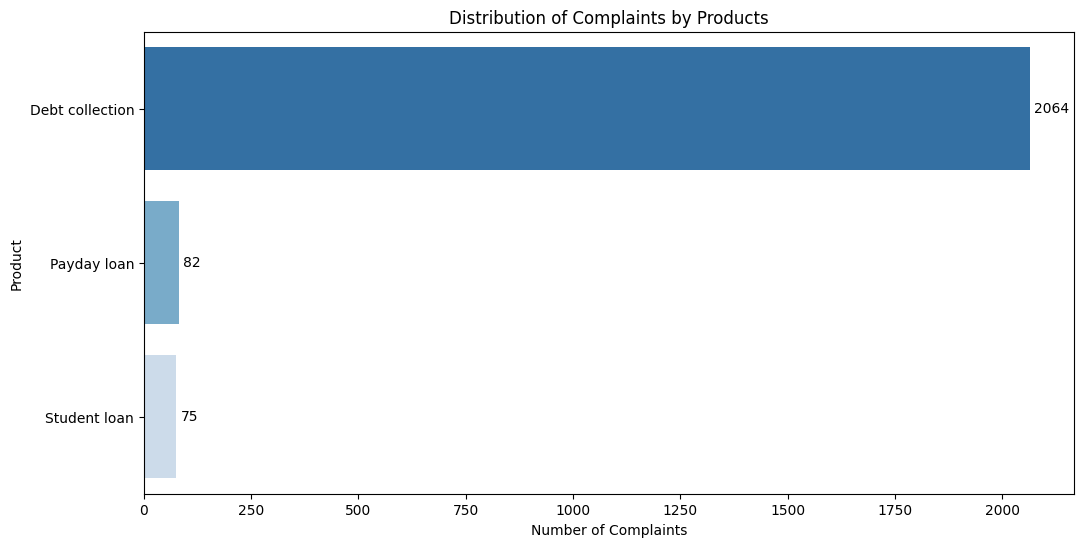

In [13]:
# Count the number of complaints per product and sort in descending order
product_counts = df['product'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
pr = sns.countplot(y='product', data=df, order=product_counts.index, palette='Blues_r')

# Add labels to each bar
for i, count in enumerate(product_counts):
    pr.text(count + 10, i, str(count), va='center')

plt.title('Distribution of Complaints by Products')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')

plt.show()

**Insights** 

The product that received the most complaints from consumers was `Debt Collection` with 2,064 complaints, then `Payday Loan` with 82 complaints and finally `Student Loan` with 75 complaints. 


##### **_a. Complaints by Product and Year_**

In [14]:
# Group the data by product and year, then count the number of complaints
complaints_per_product_year = df.groupby(['product', 'year_received']).size().reset_index(name='complaint_count')

# Sort the data by year and complaint count in descending order
complaints_per_product_year = complaints_per_product_year.sort_values(by=['year_received', 'complaint_count'], ascending=[True, False])

# Display the result
display(complaints_per_product_year)

,product,year_received,complaint_count
0,Debt collection,2015,1061
2,Payday loan,2015,47
4,Student loan,2015,32
1,Debt collection,2016,1003
5,Student loan,2016,43
3,Payday loan,2016,35


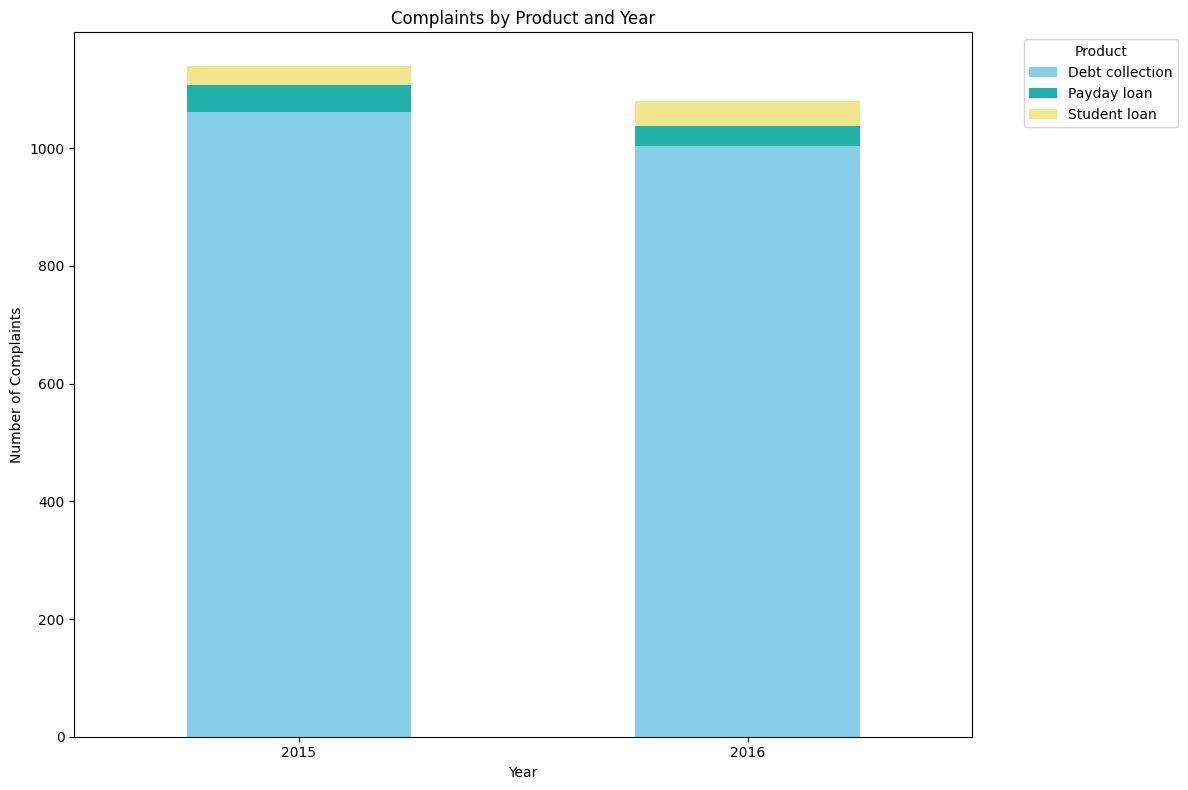

In [15]:
# Pivoting data for stacked bar chart
pivot_df = complaints_per_product_year.pivot(index='year_received', columns='product', values='complaint_count').fillna(0)

# Define colors for each product
colors = ['skyblue', 'lightseagreen','khaki']

# Plotting stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.title('Complaints by Product and Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights** 

Debt Collection is the most complained about financial product, followed by Payday Loans and Student Loans. The data suggests a need for closer scrutiny and potential regulatory action in the area of Debt Collection to address consumer concerns. Additionally, while Student Loan complaints are fewer, the increase from 2015 to 2016 may warrant monitoring to ensure the trend does not continue to rise.


##### **_b. Complaints by Product, Month and Year_**

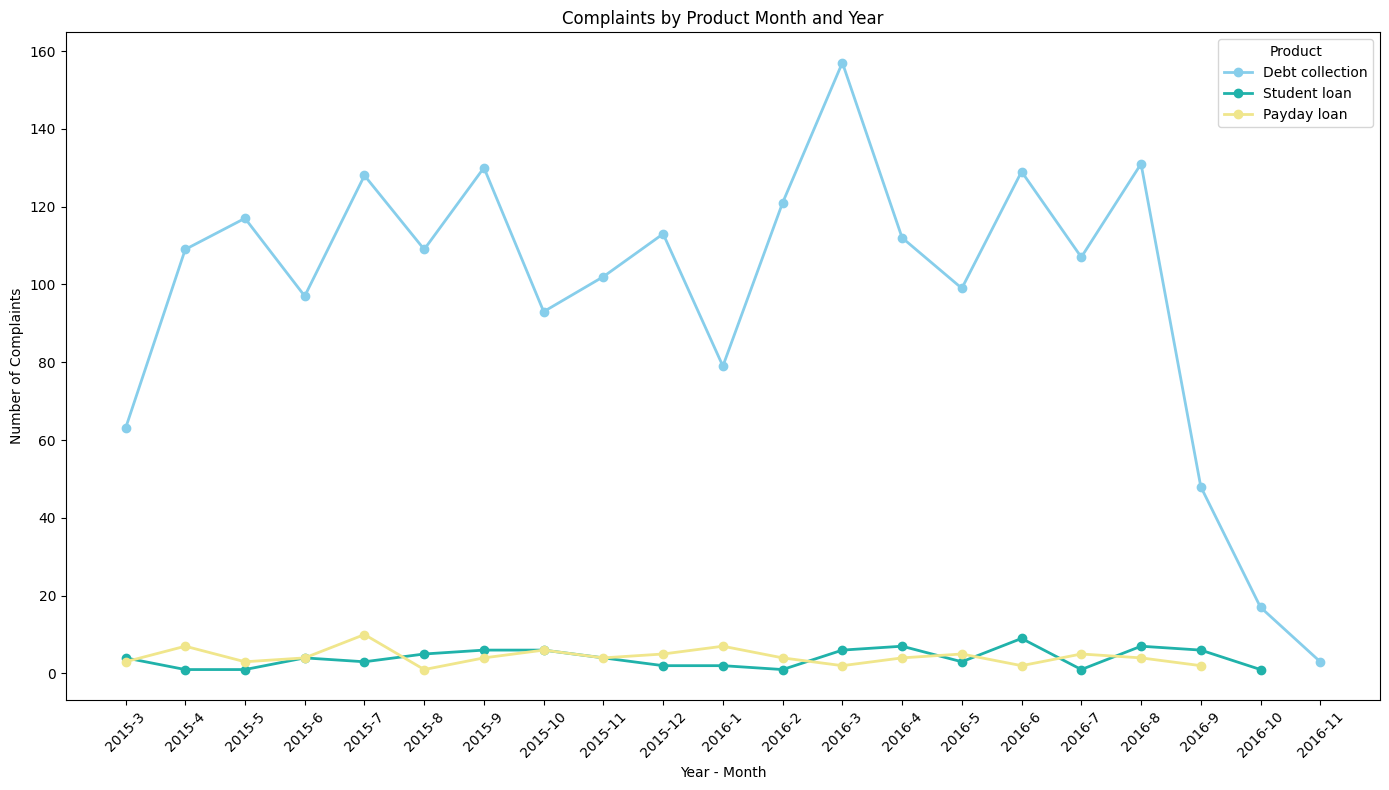

In [16]:
# Group the data by product, month and year, then count the number of complaints
complaints_per_product_month_year = df.groupby(['product', 'year_received', 'month_received']).size().reset_index(name='complaint_count')

# Sort the data by month, year, and complaint count in descending
complaints_per_product_month_year = complaints_per_product_month_year.sort_values(by=['year_received', 'month_received', 'complaint_count'], ascending=[True, True, False])

# Plotting line chart
plt.figure(figsize=(14, 8))
for product, color in zip(complaints_per_product_month_year['product'].unique(), colors):
    data = complaints_per_product_month_year[complaints_per_product_month_year['product'] == product]
    plt.plot(data['year_received'].astype(str) + '-' + data['month_received'].astype(str), 
             data['complaint_count'], marker='o', 
             label=product, color=color, linewidth=2)

plt.title('Complaints by Product Month and Year')
plt.xlabel('Year - Month')
plt.ylabel('Number of Complaints')
plt.legend(title='Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights** 

This graph shows the number of complaints received each month from March 2015 to November 2016, categorized by three products: `Debt Collection, Student Loans, and Payday Loans`.

**1. Debt Collection:**

- There are notable peaks in complaints around July 2015, February 2016, and July 2016.
- A sharp decline in complaints is observed starting from August 2016.

**2. Student Loan:**
- There is a slight increase in complaints in mid-2016 but it remains much lower compared to Debt Collection.

**3. Payday Loan:**
- The trend for Payday Loan complaints shows minor fluctuations but generally stays below 20 complaints per month.



##### **_c. Complaints by Product, Issue and Year_**

In [17]:
# Group the data by product, issue and year, then count the number of complaints
yearly_issue_complaints = df.groupby(['year_received', 'product', 'issue']).size().reset_index(name='Complaint Count')
yearly_issue_complaints = yearly_issue_complaints.sort_values(by='Complaint Count', ascending=False)

# Display the result
display(yearly_issue_complaints.head())


,year_received,product,issue,Complaint Count
17,2016,Debt collection,Cont'd attempts collect debt not owed,515
1,2015,Debt collection,Cont'd attempts collect debt not owed,510
0,2015,Debt collection,Communication tactics,176
18,2016,Debt collection,Disclosure verification of debt,144
2,2015,Debt collection,Disclosure verification of debt,135


**Insights** 

The most common issue for `Debt Collection` is *"Cont'd attempts collect debt not owed"* (515 complaints) For `Student Loans`, it is *"Dealing with my lender or servicer"* (26 complaints), and for `Payday Loans`, it is *"Charged fees or interest I didn't expect"* (22 complaints).

##### **_d. Complaints by Product, Sub Product, Issue, Sub Issue, State and Company_**

In [18]:
# Group the data by product, sub produk, issue, sub issue, state and company, then count the number of complaints
complaints_grouped = df.groupby(['year_received', 'product', 'sub_product', 'issue', 'sub_issue', 'state', 'company']).size().reset_index(name='Complaint Count')

# Sort the data by complaint count in descending
complaints_grouped = complaints_grouped.sort_values(by='Complaint Count', ascending=False)

# Displaying the top 5 issues
top_5_complaints_grouped = complaints_grouped.groupby(['year_received', 'product', 'sub_product', 'issue', 'sub_issue', 'state', 'company']).agg({'Complaint Count': 'sum'}).reset_index()
top_5_complaints_grouped = top_5_complaints_grouped.sort_values(by='Complaint Count', ascending=False).head()

# Display the result
display(top_5_complaints_grouped)


,year_received,product,sub_product,issue,sub_issue,state,company,Complaint Count
1643,2016,Debt collection,Mortgage,Taking/threatening an illegal action,Seized/Attempted to seize property,GA,"Select Portfolio Servicing, Inc",7
1030,2015,Payday loan,Payday loan,Charged fees or interest I didn't expect,Charged fees or interest I didn't expect,CA,BlueChip Financial,4
1177,2016,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,IL,Bank of America,4
686,2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,FL,ERC,4
1783,2016,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,TX,"ProCollect, Inc",4


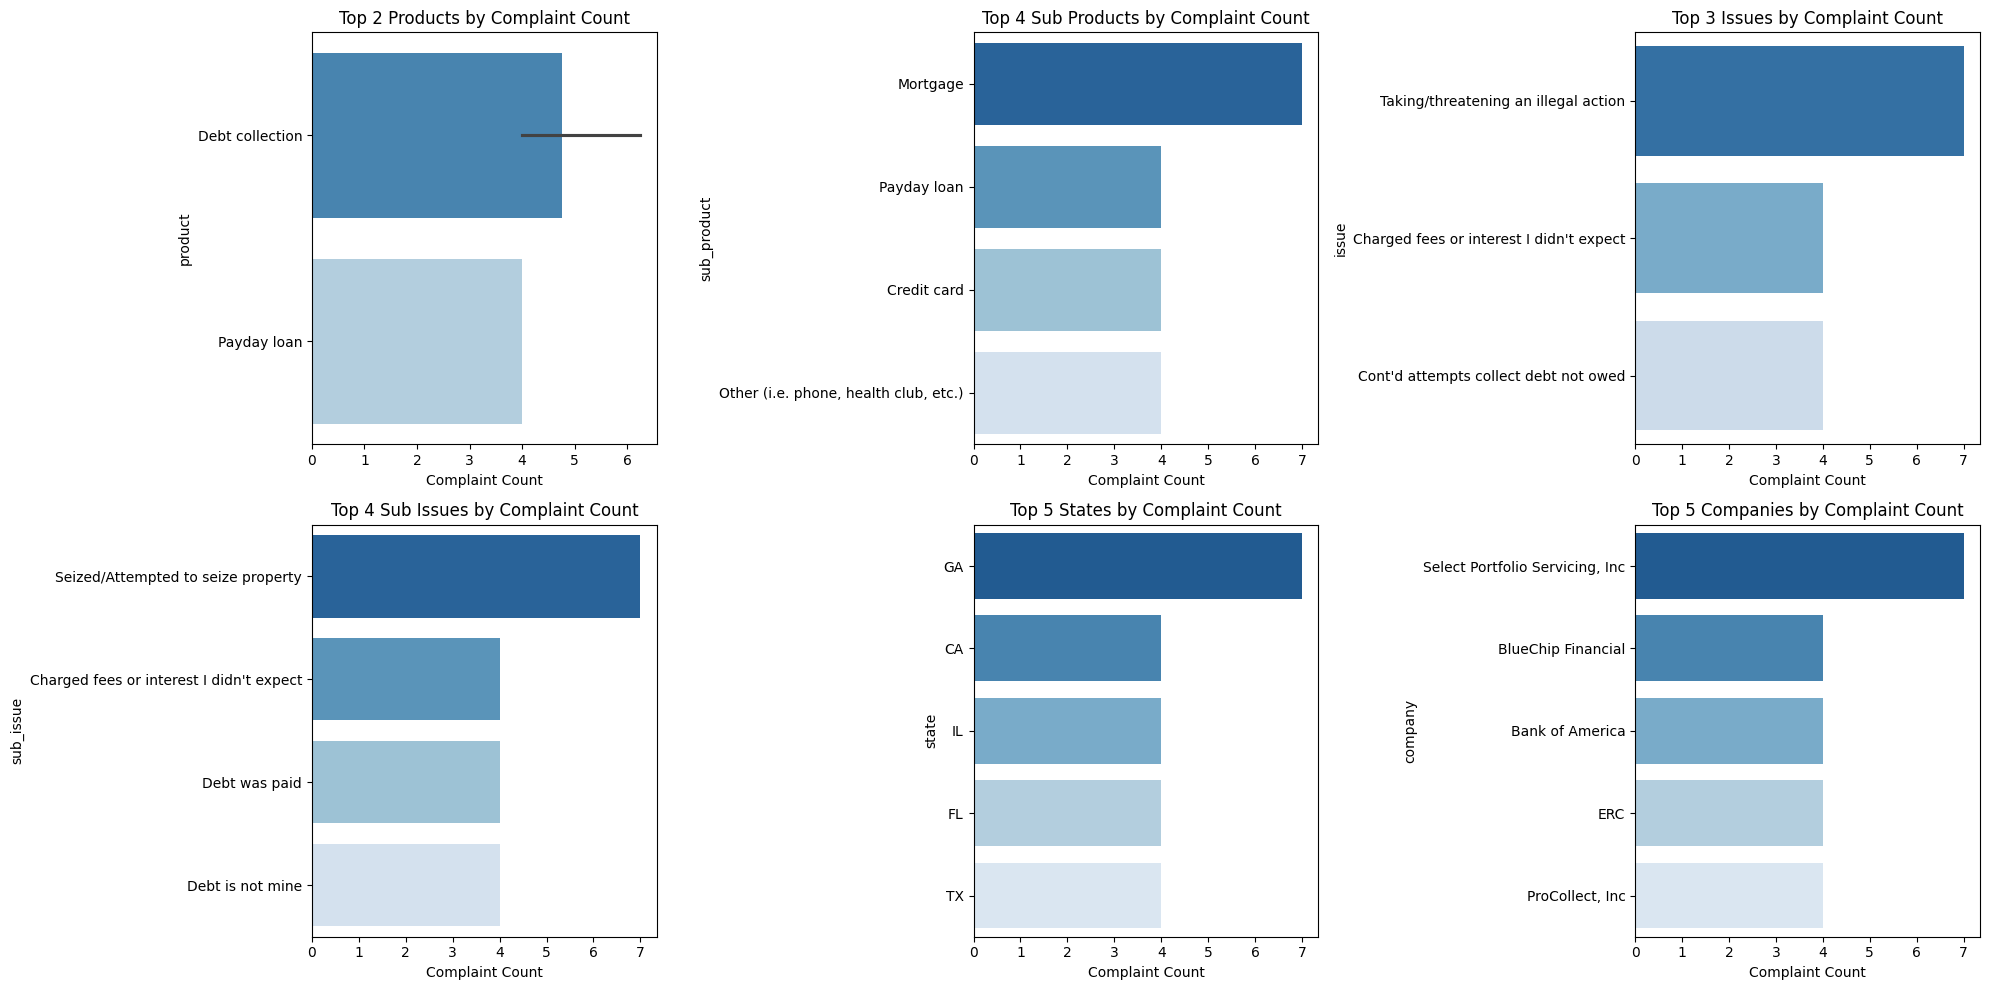

In [19]:
# Creating subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Bar plot for 'product'
sns.barplot(ax=axes[0, 0], x='Complaint Count', y='product', data=top_5_complaints_grouped, palette='Blues_r')
axes[0, 0].set_title('Top 2 Products by Complaint Count')

# Bar plot for 'sub_product'
sns.barplot(ax=axes[0, 1], x='Complaint Count', y='sub_product', data=top_5_complaints_grouped, palette='Blues_r')
axes[0, 1].set_title('Top 4 Sub Products by Complaint Count')

# Bar plot for 'issue'
sns.barplot(ax=axes[0, 2], x='Complaint Count', y='issue', data=top_5_complaints_grouped, palette='Blues_r')
axes[0, 2].set_title('Top 3 Issues by Complaint Count')

# Bar plot for 'sub_issue'
sns.barplot(ax=axes[1, 0], x='Complaint Count', y='sub_issue', data=top_5_complaints_grouped, palette='Blues_r')
axes[1, 0].set_title('Top 4 Sub Issues by Complaint Count')

# Bar plot for 'state'
sns.barplot(ax=axes[1, 1], x='Complaint Count', y='state', data=top_5_complaints_grouped, palette='Blues_r')
axes[1, 1].set_title('Top 5 States by Complaint Count')

# Bar plot for 'company'
sns.barplot(ax=axes[1, 2], x='Complaint Count', y='company', data=top_5_complaints_grouped, palette='Blues_r')
axes[1, 2].set_title('Top 5 Companies by Complaint Count')

plt.tight_layout()
plt.show()


**Insights** 

`Top 2 Products by Complaint Count` 
- Debt collection is the product with the highest number of complaints.

- Payday loan is in second place in terms of the number of complaints received.

`Top 4 Sub-Products by Complaint Count`
- Mortgage is the sub-product with the highest number of complaints.

- Payday loan, Credit card, and Other (i.e., phone, health club, etc.) also have a significant number of complaints.

`Top 3 Issues by Complaint Count`
- The issue *Taking/threatening an illegal action* has the highest number of complaints.

- It is followed by *issues Charged fees or interest I didn't expect* and *Cont'd attempts collect debt not owed*.

`Top 4 Sub-Issues by Complaint Count`
- The sub-issue *Seized/Attempted to seize property* has the highest number of complaints.

- *Charged fees or interest I didn't expect*, *Debt was paid*, and *Debt is not mine* also have high complaint counts.

`Top 5 States by Complaint Count`
- Georgia (GA) is the state with the highest number of complaints.

- California (CA), Florida (FL), and Texas (TX) also have a high number of complaints.

`Top 5 Companies by Complaint Count`
- Select Portfolio Servicing, Inc is the company with the highest number of complaints.

- BlueChip Financial, Bank of America, ERC, and ProCollect, Inc are also among the companies with a high number of complaints.

#### **_Which Sub Products receive the most consumer complaints?_**

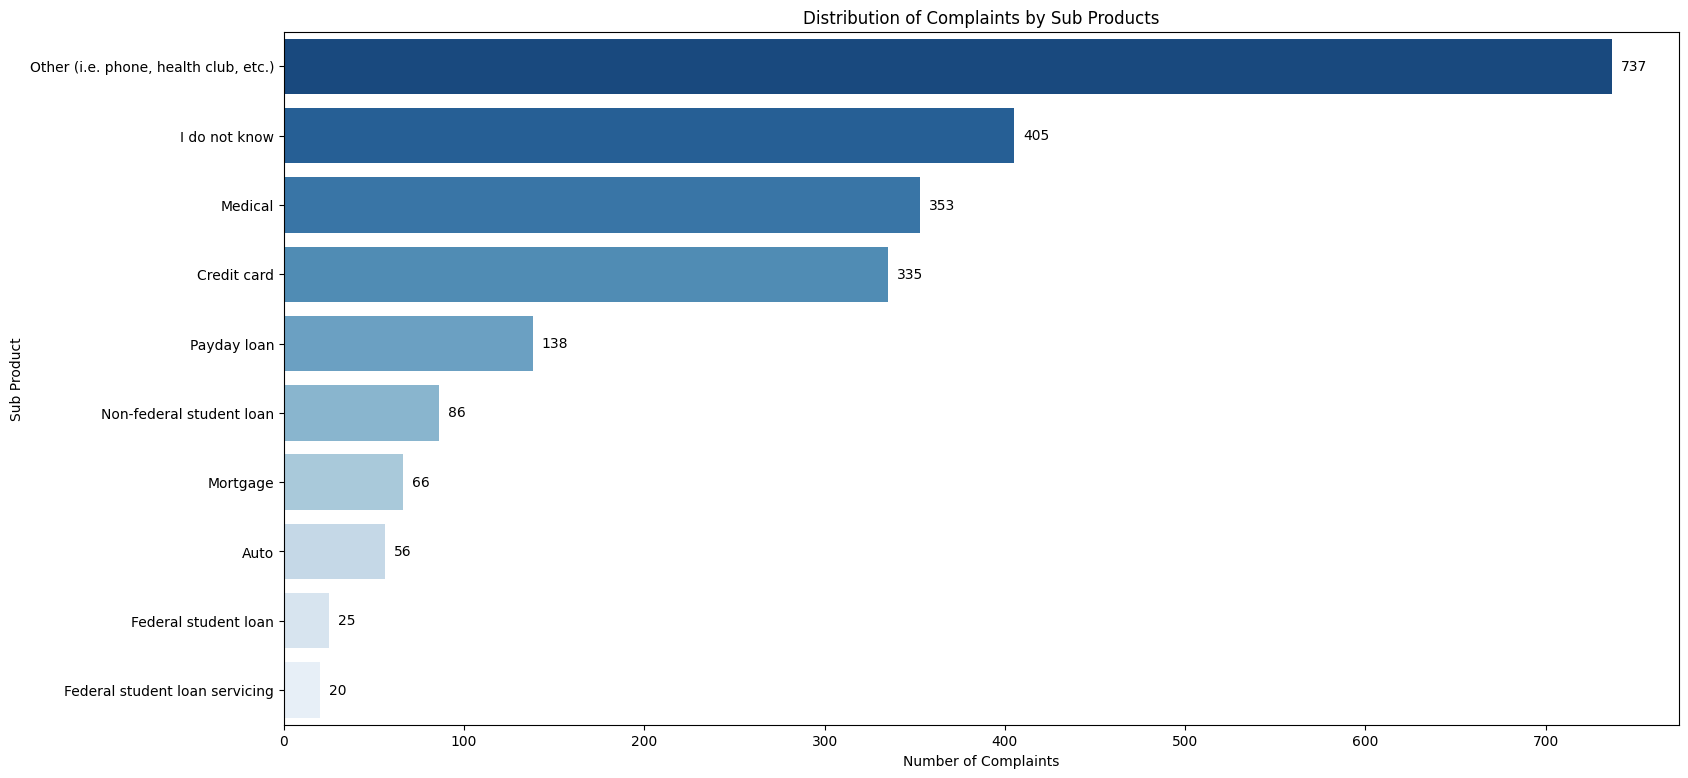

In [20]:
# Count the number of complaints per sub product and sort in descending order
sub_product_counts = df['sub_product'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 9))
sp=sns.countplot(y='sub_product', data=df, order=sub_product_counts.index, palette='Blues_r')

# Add labels to each bar
for i, count in enumerate(sub_product_counts):
    sp.text(count + 5, i, str(count), va='center')
    
plt.title('Distribution of Complaints by Sub Products')
plt.xlabel('Number of Complaints')
plt.ylabel('Sub Product')
plt.show()

**Insights** 

There are 10 Sub Products that receive complaints from consumers and the most in `Other (i.e. phone, health club, etc.)` as many as 737 complaints while the Sub Products that received the least complaints on `Federal Student Loan Service` were 20 
complaints. 

Exploratory_Data_Analysis.ipynb

#### **_What are the main issues faced by consumers?_**

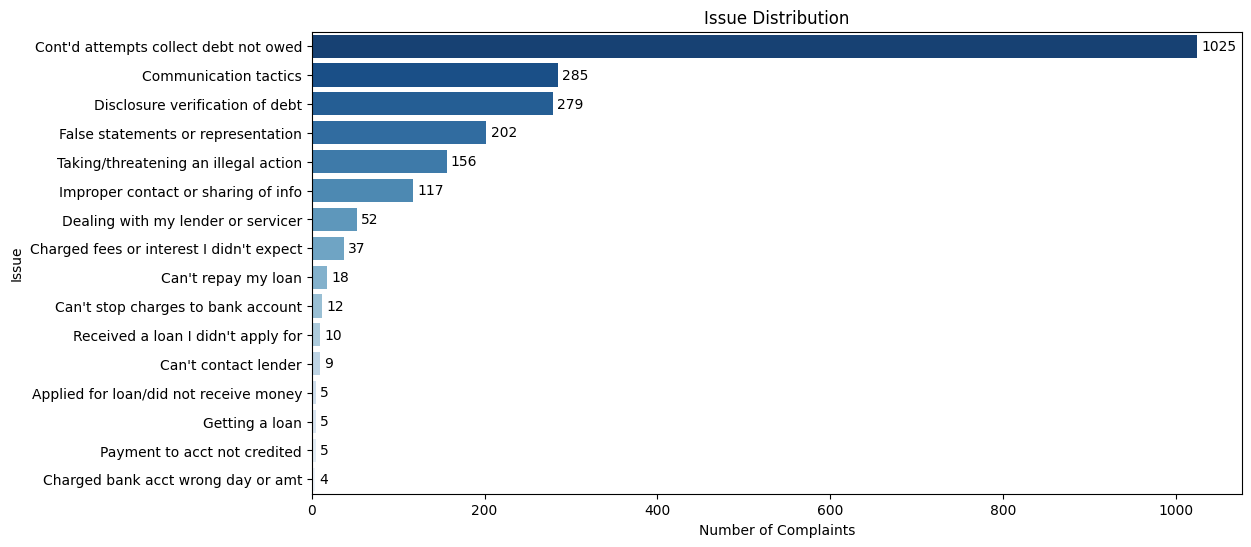

In [21]:
# Count the number of complaints per issue and sort in descending order
issue_counts = df['issue'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
isc = sns.countplot(y='issue', data=df, order=issue_counts.index, palette='Blues_r')

# Add labels to each bar
for i, count in enumerate(issue_counts):
    isc.text(count + 5, i, str(count), va='center')

plt.title('Issue Distribution')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.show()

**Insights** 

There are 16 main consumer problems and the most common problem is `Cont'd attempts collect debt not owed` with 1,025 complaints, then `Communication tactis` as many as 285 complaints, `Diclosure verification of debt` as many as 279 complaints and the main consumer problem which is  `Charged bank acc wrong day or amt` as many as 4 complaints. 



#### **_What are the sub issues faced by consumers?_**

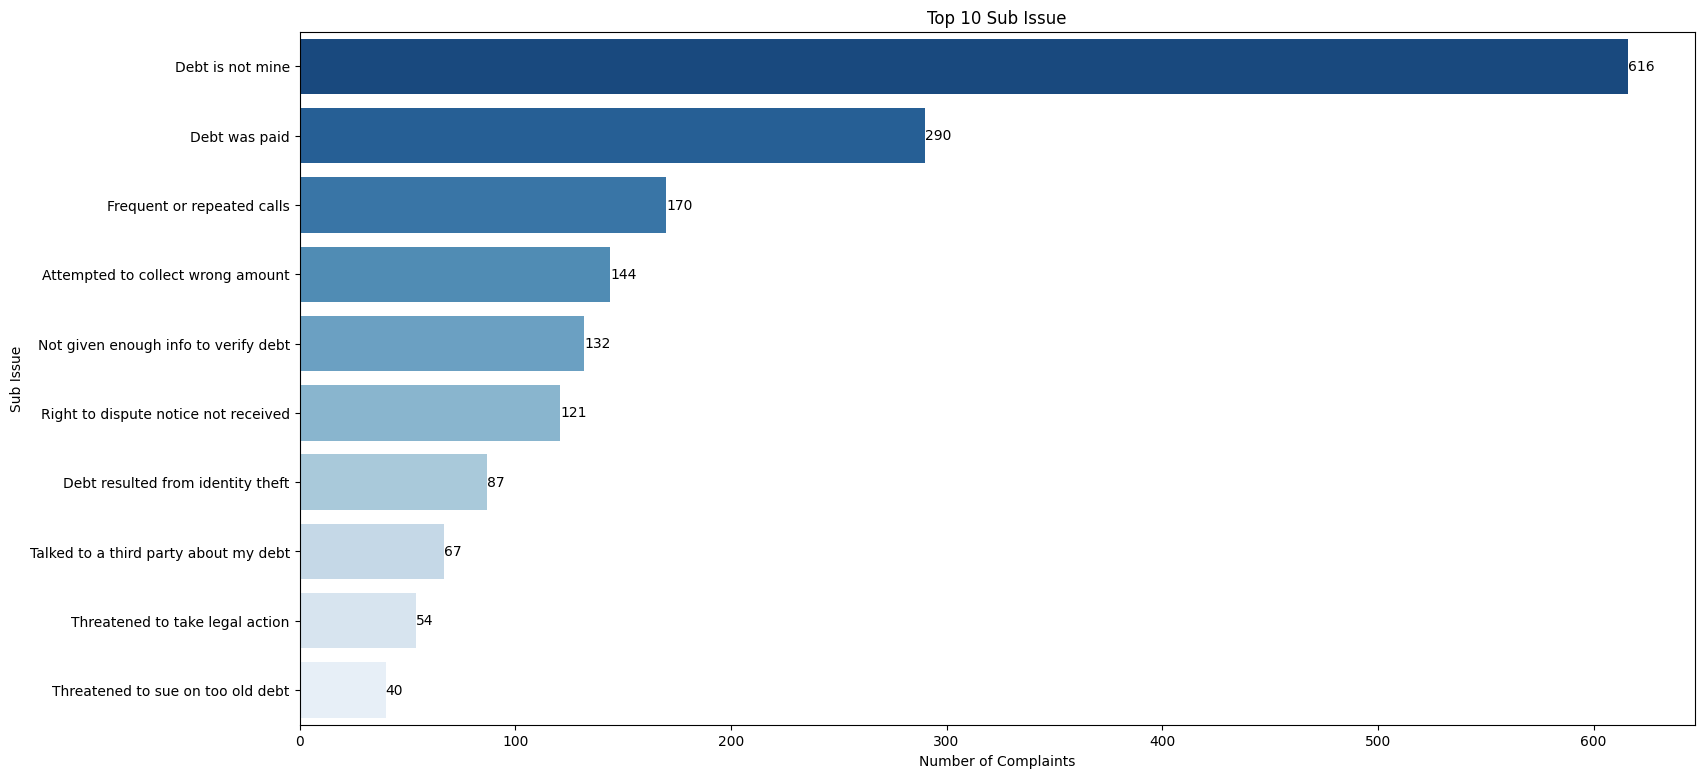

In [22]:
# Count the number of complaints per sub issue and sort in descending order
sub_issue_counts = df['sub_issue'].value_counts().sort_values(ascending=False)

 # Select the top 10 states
top_sub_issue = sub_issue_counts.head(10)

# Create a bar plot
plt.figure(figsize=(18, 9))
st = sns.barplot(x=top_sub_issue.values, y=top_sub_issue.index, palette='Blues_r')

# Add labels to each bar
for i in range(len(top_sub_issue)):
    plt.text(top_sub_issue.values[i], i, str(top_sub_issue.values[i]), color='black', ha="left", va="center")
    
plt.title('Top 10 Sub Issue')
plt.xlabel('Number of Complaints')
plt.ylabel('Sub Issue')
plt.show()

**Insights** 

Out of 44 sub-issues faced by consumers, there are 10 sub-issues that are most frequently encountered. `Debt is not mine` is the most common sub-issue faced by consumers, with 616 complaints. In the 10th position is `Threatened to sue on too old debt`, with 40 complaints.




#### **_Which 10 countries have the most complaints?_**

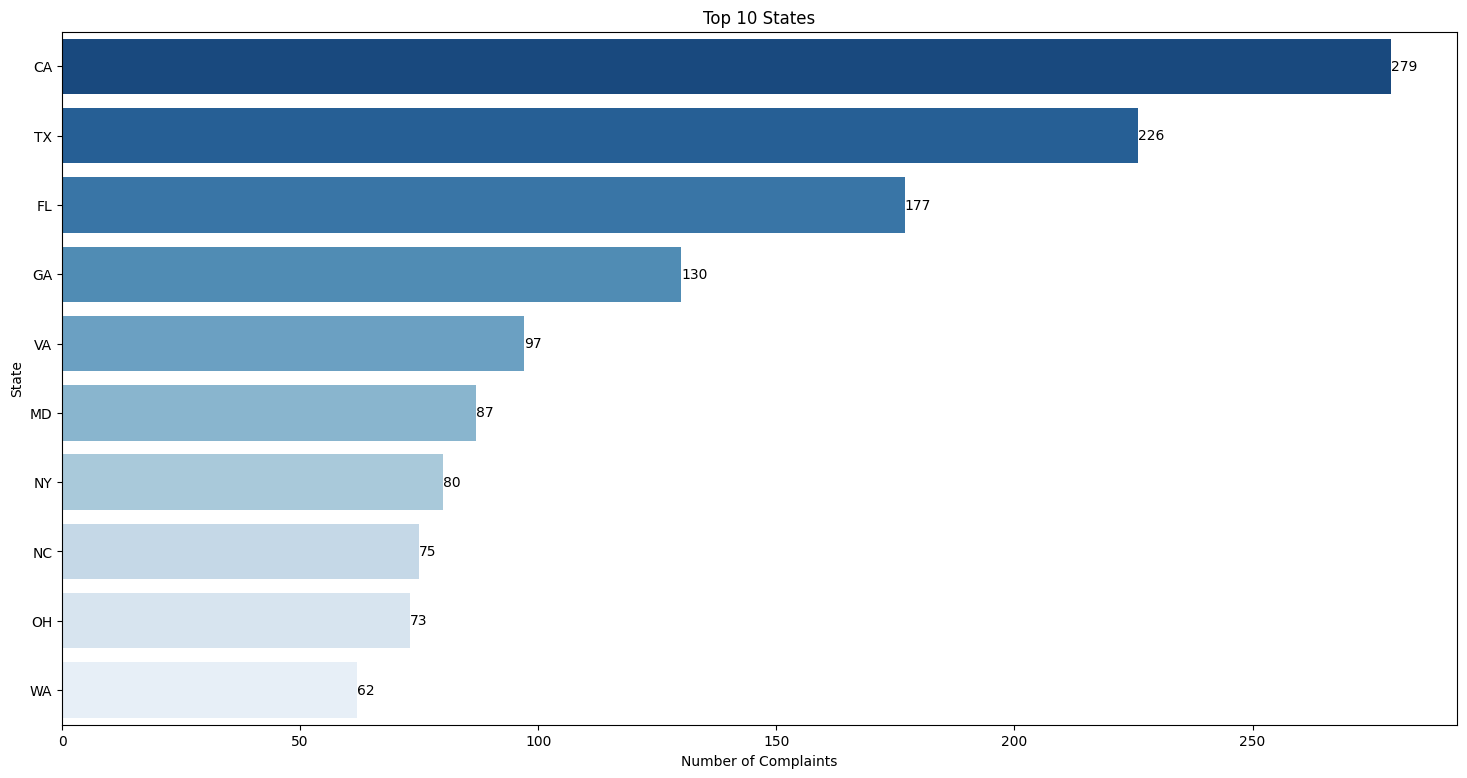

In [23]:
# Count the number of complaints per state and sort in descending order
state_counts = df['state'].value_counts().sort_values(ascending=False)

 # Select the top 10 states
top_states = state_counts.head(10)

# Create a bar plot
plt.figure(figsize=(18, 9))
st = sns.barplot(x=top_states.values, y=top_states.index, palette='Blues_r')

# Add labels to each bar
for i in range(len(top_states)):
    plt.text(top_states.values[i], i, str(top_states.values[i]), color='black', ha="left", va="center")
    
plt.title('Top 10 States')
plt.xlabel('Number of Complaints')
plt.ylabel('State')
plt.show()

**Insights** 

There are 55 States in the United States, there are 10 states that file the most complaints, including:

- California **(CA)** is the State with the most complaints with 279 complaints. 

- Texas **(TX)** is the second most filed with 226 complaints. 
- Florida **(FL)** is the third place with the most complaints with 177 complaints.
- Washington **(WA)** is the tenth position with the most complaints with 62 complaints.


#### **_Which are the top 10 companies receiving the most complaints from consumers?_**

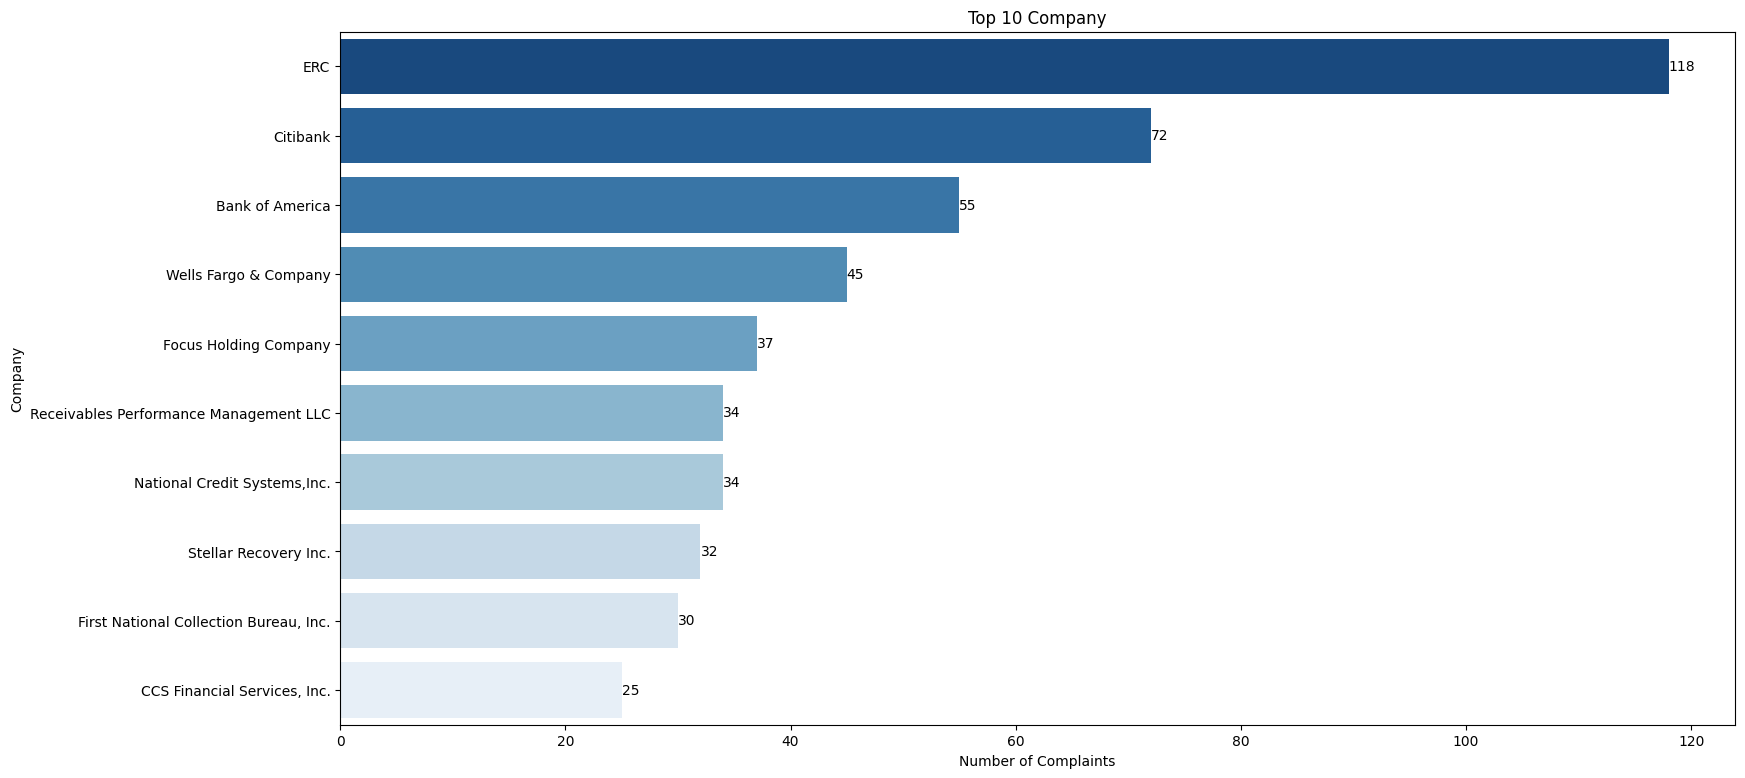

In [24]:
# Count the number of complaints per company and sort in descending order
company_counts = df['company'].value_counts().sort_values(ascending=False)

 # Select the top 10 cpmpany
top_company = company_counts.head(10)

# Create a bar plot
plt.figure(figsize=(18, 9))
st = sns.barplot(x=top_company.values, y=top_company.index, palette='Blues_r')

# Add labels to each bar
for i in range(len(top_company)):
    plt.text(top_company.values[i], i, str(top_company.values[i]), color='black', ha="left", va="center")
    
plt.title('Top 10 Company')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.show()

**Insights** 

Among the 556 companies involved, there are 10 companies that received the most complaints from consumers. These are:

- `ERC` is the company with the highest number of complaints, totaling 118 complaints.
- The second company with the most complaints is `Citibank`, with 72 complaints.
- The third company with the most complaints is `Bank of America`, with 55 complaints.
- The tenth company with the most complaints is `Wells Fargo & Company`, with 45 complaints.



#### **_How does the company usually respond to consumer complaints?_**

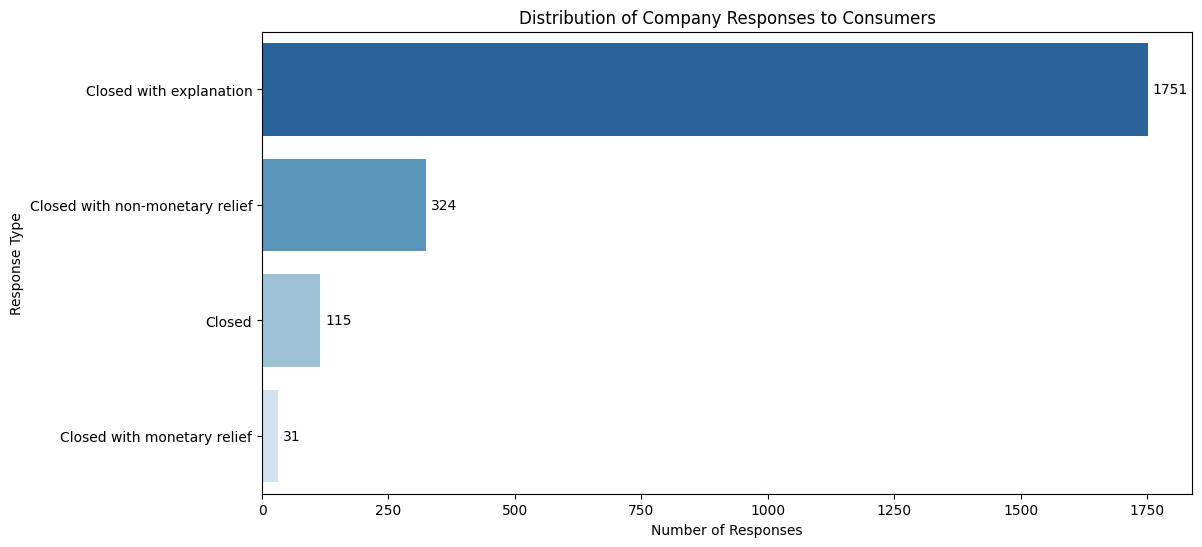

In [25]:
# Get the counts of each company response to consumers and sort them
company_response_to_consumer_counts = df['company_response_to_consumer'].value_counts().sort_values(ascending=False)

# Create a bar plot 
plt.figure(figsize=(12, 6))  
sns.barplot(x=company_response_to_consumer_counts.values, y=company_response_to_consumer_counts.index, palette='Blues_r')

# Add labels to each bar
for i, count in enumerate(company_response_to_consumer_counts):
    plt.text(count + 10, i, str(count), va='center')

plt.title('Distribution of Company Responses to Consumers')  
plt.xlabel('Number of Responses')  
plt.ylabel('Response Type')  

plt.show()

**Insights** 

There are 4 categories of responses given by the Company:

**1. Closed with Explanation:**
- This is the most common type of response, with 1,751 instances. It indicates that the majority of complaints were resolved by providing an explanation to the consumer.

**2. Closed with non-monetary relief:**
- The second most common response type, with 324 instances. This implies that the company provided some form of relief or resolution that did not involve monetary compensation.

**3. Closed:**
- There are 115 instances of complaints being simply closed without additional context provided. This might indicate cases where no further action was necessary or possible.

**4. Closed with monetary relief:**
- There were 31 responses from companies that were closed with monetary compensation. This suggests that in only a small number of cases did the companies provide monetary compensation as part of the resolution.


#### **How often does the company respond to complaints in a timely manner?**

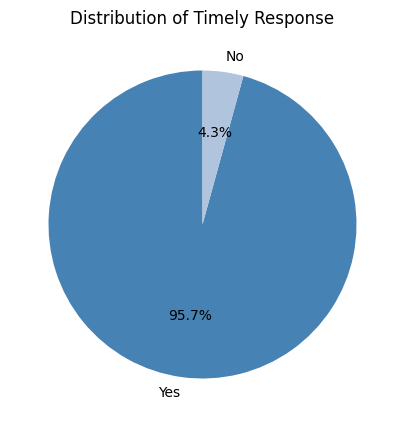

In [26]:
# Define the colors using named colors
colors = ['steelblue', 'lightsteelblue']

# Create the pie chart
plt.figure(figsize=(10, 5))
df['timely_response'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Timely Response')
plt.ylabel('')
plt.show()

**Insights** 

The chart indicates that most companies are very efficient in responding to consumer complaints in a timely manner, with 95.7% of complaints receiving timely responses. However, there is still room for improvement to ensure that all complaints are handled promptly, as 4.3% of complaints did not receive timely responses. Timely handling of complaints is crucial for consumer satisfaction and maintaining the company's reputation.


#### **How many complaints are there each month and year?**

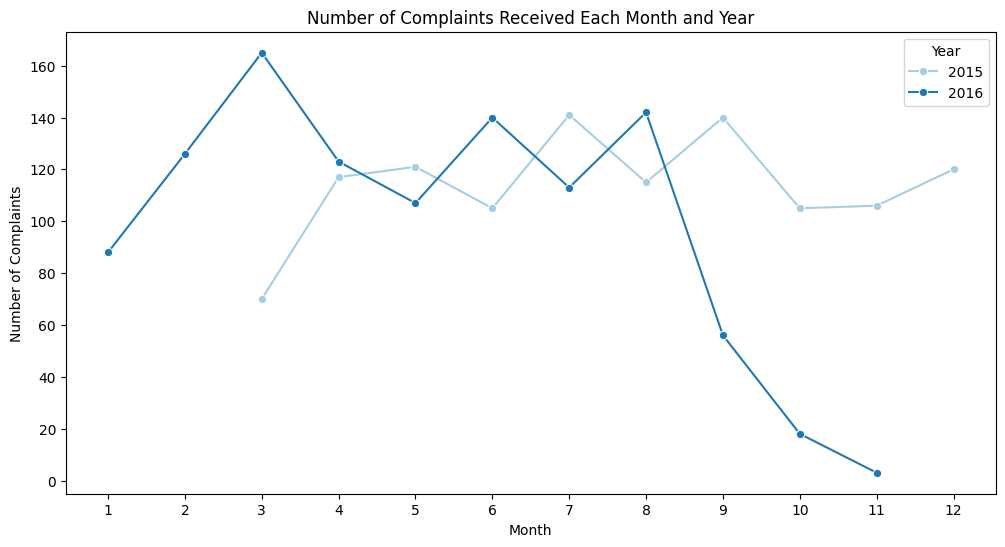

In [27]:
# Group data by year and month
monthly_complaints = df.groupby(['year_received', 'month_received']).size().reset_index(name='complaints_count')

# Plotting the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_received', y='complaints_count', hue='year_received', 
             data=monthly_complaints, marker='o', palette='Paired')

# Add title and labels
plt.title('Number of Complaints Received Each Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.legend(title='Year')
plt.xticks(ticks=range(1, 13), labels=[str(i) for i in range(1, 13)])
plt.show()

**Insights** 

The number of complaints received each month in 2015 and 2016 fluctuated.

- In 2015, 70 complaints were received in March and an increase of 140 complaints in September. 

- In 2016, 88 complaints were received starting in January and there was an increase of 165 complaints in March, marking the highest peak for 2016. The significant decline began in September, with the number of complaints gradually decreasing to below 20 complaints in November.




#### **How do the trends in the number of complaints received compare to those sent to the company?**


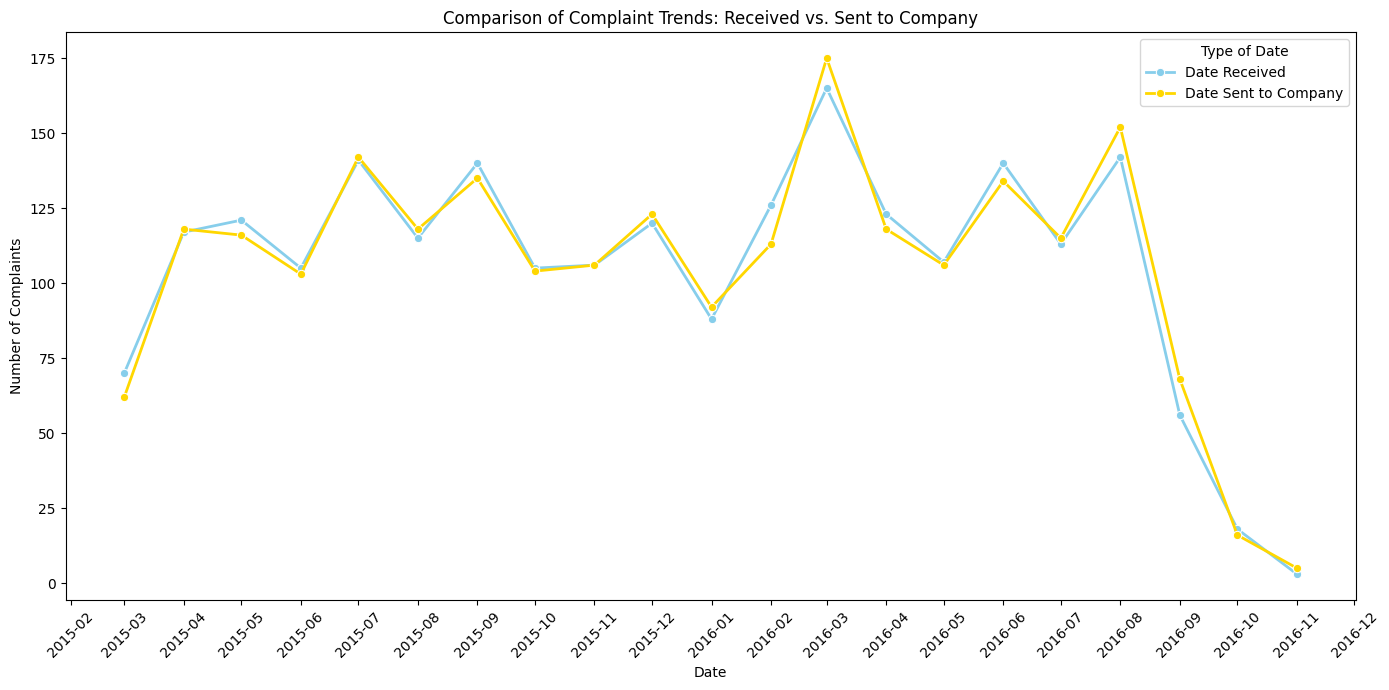

In [28]:
# Group by year and month for 'date_received'
monthly_trend_received = df.groupby(['year_received', 'month_received']).size().reset_index(name='complaints_count_received')
monthly_trend_received = monthly_trend_received.rename(columns={'year_received': 'year', 
                                                                'month_received': 'month'})
monthly_trend_received['date'] = pd.to_datetime(monthly_trend_received[['year', 'month']].assign(day=1))

# Group by year and month for 'date_sent_to_company'
monthly_trend_sent = df.groupby(['year_sent_to_company', 'month_sent_to_company']).size().reset_index(name='complaints_count_sent')
monthly_trend_sent = monthly_trend_sent.rename(columns={'year_sent_to_company': 'year', 
                                                        'month_sent_to_company': 'month'})
monthly_trend_sent['date'] = pd.to_datetime(monthly_trend_sent[['year', 'month']].assign(day=1))

# Plotting the trends
plt.figure(figsize=(14,7))

# Plot for 'date_received'
sns.lineplot(x='date', y='complaints_count_received', data=monthly_trend_received, marker='o', label='Date Received', color='skyblue',linewidth=2)

# Plot for 'date_sent_to_company'
sns.lineplot(x='date', y='complaints_count_sent', data=monthly_trend_sent, marker='o', label='Date Sent to Company', color='gold', linewidth=2)


locator = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.title('Comparison of Complaint Trends: Received vs. Sent to Company')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.legend(title='Type of Date')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


**Insights** 

 - There are noticeable peaks in complaints around March 2016 for both date types.

- The absence of significant differences between the number of complaints received and sent to the company suggests that complaints are processed without delays. This highlights the promptness of the complaint management process.

- Both lines peak at approximately the same points, such as in March 2016, suggesting synchronous handling of complaints.

- Complaints generally rise and fall together in both 2015 and 2016, with significant peaks in the middle of the year and declines towards the end of the year.

- The sharp decline in complaints after August 2016 is evident in both lines.


# **5. Insights summary**

- The products that received the most complaints from consumers in 2015 and 2016 were `Debt Collection, Payday Loan and Student Loan`.

- Sub-products that receive complaints from consumers and are most often on `Other (i.e. phone, health club, etc.)` as many as 737 complaints while the Sub Products that received the least complaints on `Federal Student Loan Service` were 20 complaints.
- The main problems faced by the most consumers are `Cont'd attempts collect debt not owed` as many as 1,025 complaints, then `Communication tactis` as many as 285 complaints, `Diclosure verification of debt` as many as 279 complaints and the least faced by consumers is `Charged bank acc wrong day or amt` as many as 4 complaints.  
- `Debt is not mine` is the sub-issue that is most faced by consumers with 616 complaints and in 10th position there is 'Threatened to sue no too old debt' as many as 40 complaints. 
- `California (CA)` is the State with the most complaints with 279 complaints. 
- `ERC` is the company that received the most complaints with 118 complaints. 
- The tag used to categorize the most complaints on the `Servicemember` tag.
- All complaints in this dataset are accompanied by consumer consent.
- All consumers submit complaints via the `Web`.
- Companies mostly resolve complaints with 'Closed with Explanation' and with `Closed with non-monetary relief` as the second most common form of settlement.
- Most companies are very efficient in responding to consumer complaints in a timely manner, with 95.7% of complaints getting a timely response.
- The number of complaints received each month in 2015 and 2016 fluctuated. In 2015 there was an increase in September as many as 140 complaints while in 2016 there was an increase of 165 complaints in March and experienced a significant decrease starting in September 2016. 
- The absence of a significant difference between the number of complaints received and sent to the company indicates that the complaint is processed without delay. This signifies the correctness of the complaint management process.

# **6. Recommendations**

- Can allocate more resources to address key issues, such as *"Cont'd attempts collect debt not owed and Communication tactics"* by providing specialized training for the grievance team in addressing these issues.

- Review and improve processes related to sub-products ((Other (i.e. phone, health club, etc.)) to reduce the number of complaints. 

- Identify the specific factors that are causing the high number of complaints in California.

- Conduct in-depth audits of companies with the highest number of complaints, such as ERC companies.

- Provide regular training for the complaint handling team to improve their ability and knowledge in handling various types of complaints and to maintain the efficiency of the complaint handling process. 

- Conduct periodic monitoring and evaluation of complaint trends to ensure that any changes or fluctuations can be identified and addressed immediately.

